## Overview 🪰
- Population of fireflies that can move in a continuous search space.
- Brightness function that evaluates the quality of each position
- A light intensity function that determines how attractive a firefly is to other fireflies
- Set of parameters that control the inital light intensity, the light absorption coefficent and the randomization factor
## Uses
- The algorithm can be used to find the optimal solution to a complex optimization problem, such as feature selection or function optimization.
- Each iteration, the firefly compares its brightness with other fireflies and moves towards a brighter firefly if it exists.
- the movement of a firefly is influenced by the light intensity, which decreases as the distance between fireflies increases, and by a random noise factor.
- The algorithm finished when a predefined criterion is met, such as max iterations or desired solution quality.


## [Visualization!](https://g.co/gemini/share/3faa627f26ec)

In [ ]:
import numpy as np

def fitness(x):
  return 1 + np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x)+1))))

num_fireflies = 100
num_dims = 10
max_iter = 1000
inital_light_intensity = 1
gamma = 0.5 # Light absorbtion coefficent
alpha = 0.2 # Randomization Factor
lower_bound = -10
upper_bound = 10
# initalize the firefly positions and brightness values randomly
positions = np.random.uniform(lower_bound, upper_bound, (num_fireflies, num_dims))
brightness = np.array([fitness(x) for x in positions])
# === main loop ===
for i in range(max_iter):
  # Loop over each firefly
  for j in range(num_fireflies):
    # Loop over each other firefly.
    for k in range(num_fireflies):
      # check if the firefly is brighter than the current one.
      if brightness[k] > brightness[j]:
        # Calculate the distance between the two fireflies
        distance = np.linalg.norm(positions[j] - positions[k])
        # Calculate the light intensity at the current firefly positon.
        intensity = 10 * np.exp(-gamma * distance**2)
        # Generate a new position by moving towards the brighter firefly
        new_position = positions[j] + intensity * (positions[k] - positions[j]) + alpha * (np.random.uniform(-1,1,num_dims) - 0.5)
        # Apply boundary conditions
        new_position = np.clip(new_position, lower_bound, upper_bound)
        # Evaluate the fitness value of the new position
        new_fitness = fitness(new_position)
        # Update the position and brightness values if the new position is better
        if new_fitness < brightness[j]:
          positions[j] = new_position.copy()
          brightness[j] = new_fitness
        best_firefly = np.argmin(brightness)
        best_fitness = np.min(brightness)
        #print(f"Iteration {i+1}: Best fitness = {best_fitness}")
print(f"Best fitness = {best_fitness}")
print(f"Best position = {positions[best_firefly]}")







Best fitness = 0.04553535265993469
Best position = [-3.10789968e+00 -4.42033564e+00 -2.07947170e-03  5.19354327e-02
 -7.00017448e+00 -2.19991011e-02 -4.33493220e-02  5.01675021e-02
 -3.36271542e-03 -9.89709535e+00]


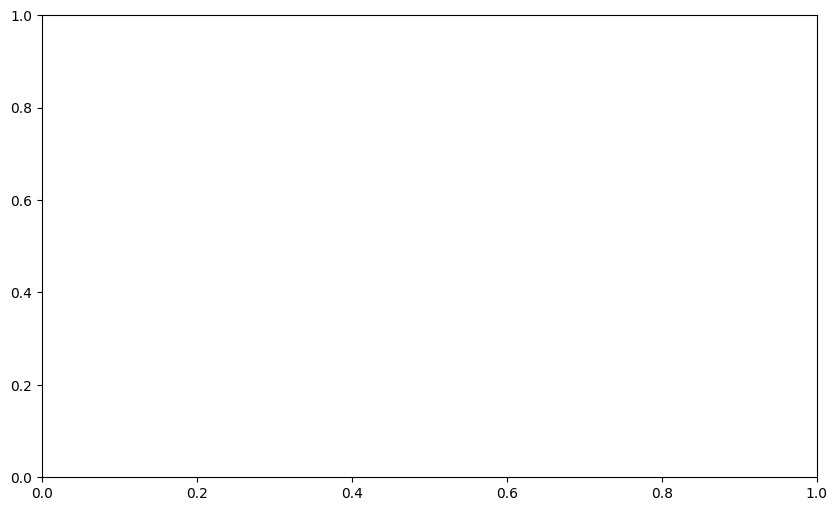

Best fitness = 0.01263901326669925
Best position = [ 1.59560017e-02 -4.45366011e+00 -5.42178344e+00  6.51488998e-03
 -1.03884343e-02  1.75885559e-02 -4.18212174e-03  1.43323364e-02
  6.59297808e-03  3.22528632e-02]


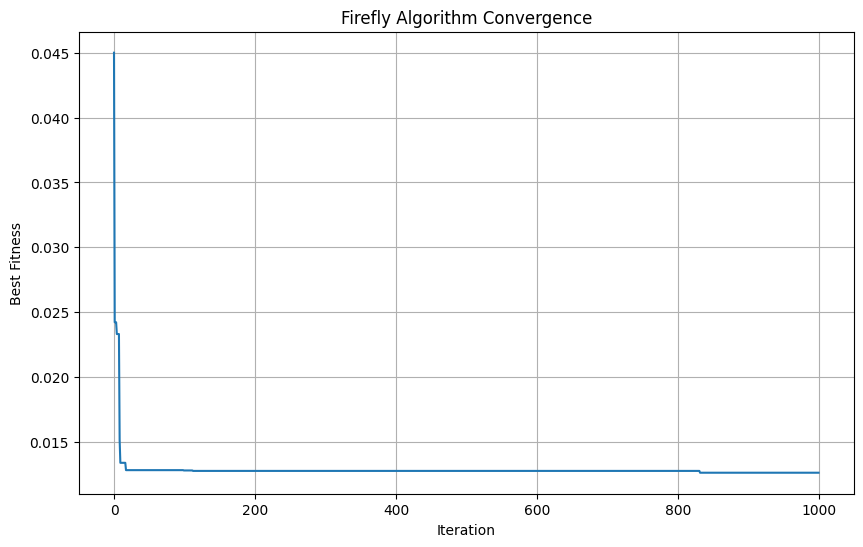

In [ ]:
# prompt: create a visual representation of our Firefly Algorithm on an optimization problem!

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# ... (preceding code for Firefly Algorithm) ...

# Add these lists to store the best fitness at each iteration
history_best_fitness = []
history_best_position = []

# === main loop ===
fig, ax = plt.subplots(figsize=(10, 6))
plt.ion() # Turn on interactive mode

for i in range(max_iter):
  # Loop over each firefly
  for j in range(num_fireflies):
    # Loop over each other firefly.
    for k in range(num_fireflies):
      # check if the firefly is brighter than the current one.
      if brightness[k] > brightness[j]:
        # Calculate the distance between the two fireflies
        distance = np.linalg.norm(positions[j] - positions[k])
        # Calculate the light intensity at the current firefly positon.
        intensity = np.exp(-gamma * distance**2) # Corrected variable name
        # Generate a new position by moving towards the brighter firefly
        new_position = positions[j] + intensity * (positions[k] - positions[j]) + alpha * (np.random.uniform(-0.5, 0.5, num_dims)) # Corrected random range
        # Apply boundary conditions
        new_position = np.clip(new_position, lower_bound, upper_bound)
        # Evaluate the fitness value of the new position
        new_fitness = fitness(new_position)
        # Update the position and brightness values if the new position is better
        if new_fitness < brightness[j]:
          positions[j] = new_position.copy()
          brightness[j] = new_fitness

  best_firefly_index = np.argmin(brightness)
  best_fitness = np.min(brightness)
  best_position = positions[best_firefly_index]

  history_best_fitness.append(best_fitness)
  history_best_position.append(best_position)

  # --- Visualization ---
  if num_dims == 2: # Only visualize in 2D for simplicity
      ax.clear()
      ax.scatter(positions[:, 0], positions[:, 1], c=brightness, cmap='viridis', s=50)
      ax.scatter(best_position[0], best_position[1], c='red', marker='*', s=200, label='Best Position')
      ax.set_xlim(lower_bound, upper_bound)
      ax.set_ylim(lower_bound, upper_bound)
      ax.set_title(f'Iteration {i+1}/{max_iter}\nBest Fitness: {best_fitness:.4f}')
      ax.set_xlabel('Dimension 1')
      ax.set_ylabel('Dimension 2')
      ax.legend()
      display(fig)
      clear_output(wait=True)
      time.sleep(0.01) # Small delay to make visualization smoother

plt.ioff() # Turn off interactive mode after the loop
plt.show() # Show the final plot

print(f"Best fitness = {best_fitness}")
print(f"Best position = {best_position}")

# Plotting the convergence of the best fitness
plt.figure(figsize=(10, 6))
plt.plot(history_best_fitness)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Firefly Algorithm Convergence')
plt.grid(True)
plt.show()